In [25]:
import pymatgen.core as mg
from pymatgen.io.vasp.inputs import Poscar
from ase.visualize import view
import ase
import os
import pymatgen

def view_(pymatgen_strus):
    if isinstance(pymatgen_strus, pymatgen.core.structure.Structure):
        pymatgen_strus.to(filename=".temp.vasp", fmt="POSCAR")
        ase_strus = ase.io.read(".temp.vasp")
        os.remove(".temp.vasp")
    elif isinstance(pymatgen_strus, list):
        ase_strus = []
        for i in pymatgen_strus:
            i.to(filename=".temp.vasp", fmt="POSCAR")
            ase_strus.append(ase.io.read(".temp.vasp"))
            os.remove(".temp.vasp")
    view(ase_strus)

In [26]:
# 创建结构
lattice_cubic = mg.Lattice.cubic(3.8025)
N = mg.Composition("N")
cgN = mg.Structure.from_spacegroup(sg=199, lattice=lattice_cubic, species=N, coords=[[0.085,0.085,0.085]])
# view_(cgN)

In [64]:
# 找吸附位点
from pymatgen.core import surface
from pymatgen.analysis.adsorption import AdsorbateSiteFinder,plot_slab
slabs = surface.generate_all_slabs(cgN, max_index=1, min_slab_size=1, min_vacuum_size=15)
# view_(slabs)
cgN_100 = [slab for slab in slabs if slab.miller_index==(1,0,0)]
view_(cgN_100)
asf_ads_sites = AdsorbateSiteFinder(cgN_100[0])
ads_sites = asf_ads_sites.find_adsorption_sites()


<AxesSubplot:>

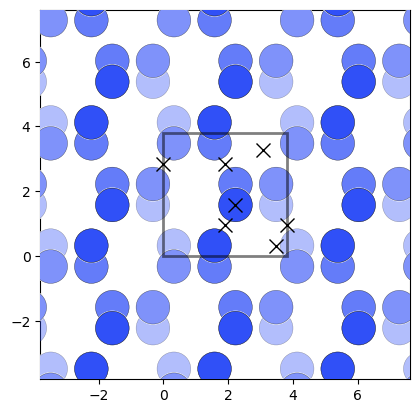

In [63]:
# 绘图
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plot_slab(cgN_100[0], ax, adsorption_sites=True)